## Experience Analytics - Task 3

In [1]:
# Import packages
import os,sys

# Add the path to the directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
    
from scripts.utils import *
from db_connection.postgresql_connection import *

In [2]:
# Load dataset from postgres
telecom_df = fetch_data_from_postgres()

In [3]:
# Dataframe head
telecom_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# select columns for this task
telecom_df = telecom_df[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]

In [5]:
# checking null value
telecom_df.isnull().sum()

MSISDN/Number                   1066
Handset Type                     572
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
dtype: int64

In [6]:
# getting missing value with percentage
get_missing_colum_with_percentage(telecom_df)

,num_missing,percent_missing (%)
MSISDN/Number,1066,0.71
Handset Type,572,0.38
Avg RTT DL (ms),27829,18.55
Avg RTT UL (ms),27812,18.54
TCP DL Retrans. Vol (Bytes),88146,58.76
TCP UL Retrans. Vol (Bytes),96649,64.43
Avg Bearer TP DL (kbps),1,0.00
Avg Bearer TP UL (kbps),1,0.00


In [7]:
# filling missing value with mean or mode
fill_missing_values_t3(telecom_df)
# check null value
telecom_df.isnull().sum()

MSISDN/Number                  0
Handset Type                   0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

Task 3. 1

Aggregate  per customer

Average TCP retransmission

Average RTT

Handset type

Average throughput


In [8]:
# Aggregate per customer
aggregate_customer_data(telecom_df)

,MSISDN/Number,Avg TCP Retrans (Bytes),Avg RTT (ms),Handset Type,Avg Throughput (kbps)
0,3.360100e+10,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000
1,3.360100e+10,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.500000
2,3.360100e+10,1.078479e+07,63.729294,undefined,48.500000
3,3.360101e+10,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.000000
4,3.360101e+10,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.000000
...,...,...,...,...,...
106852,3.379000e+10,1.078479e+07,20.000000,Apple iPhone 8 Plus (A1897),58.000000
106853,4.188282e+10,8.491987e+06,154.561991,Huawei B528S-23A,8479.471611
106854,3.197021e+12,1.078479e+07,63.729294,Quectel Wireless. Quectel Ec25-E,0.500000
106855,3.370000e+14,1.078479e+07,63.729294,Huawei B525S-23A,16.500000


Task 3.2

Compute & list 10 of the top, bottom, and most frequent

In [ ]:
# Aggregates data 
process_data(telecom_df)

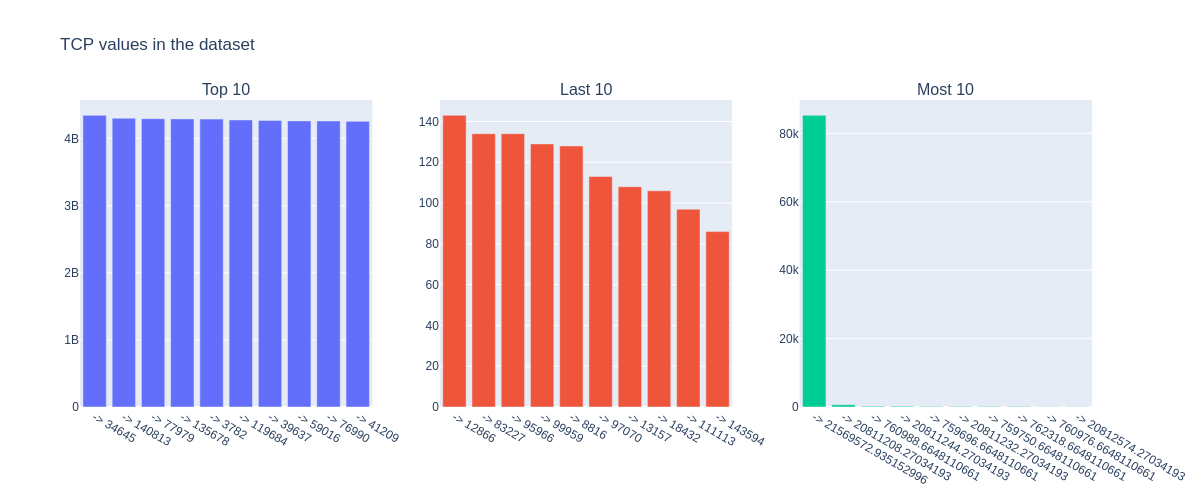

In [10]:
# TCP values
# Analyze tcp
top_10, last_10, most_10 = analyze_tcp(telecom_df)
mult_hist([top_10, last_10, most_10], 1,
          3, "TCP values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

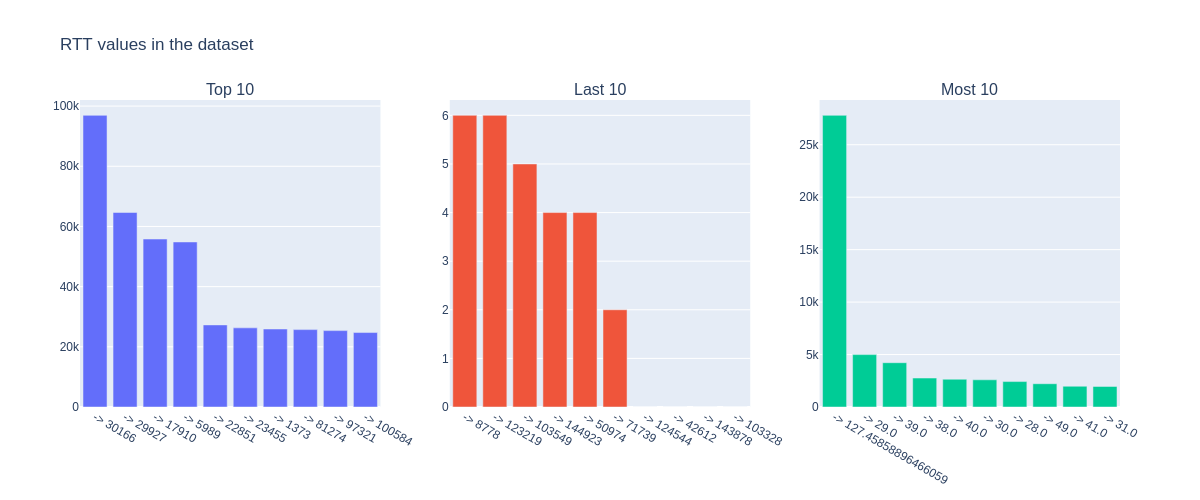

In [11]:
# Analyze rtt
top_10, last_10, most_10 = analyze_rtt(telecom_df)
mult_hist([top_10, last_10, most_10], 1,
          3, "RTT values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

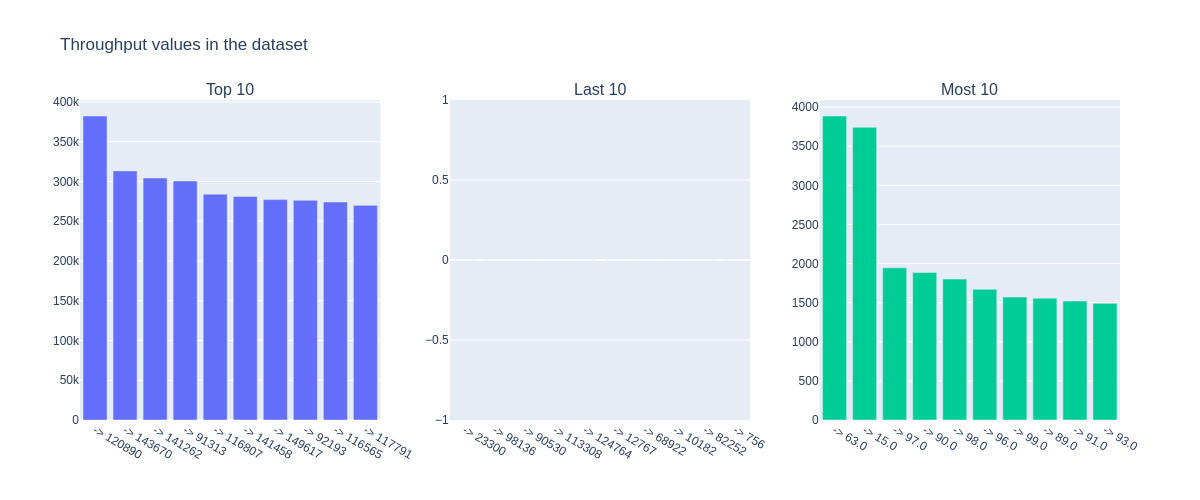

In [12]:
# Analyze tp
top_10, last_10, most_10 = analyze_tp(telecom_df)
mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "Throughput values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

Task 3.3

Compute & report

The distribution of the average throughput per handset type and provide interpretation for your findings.

The average TCP retransmission view per handset type and provide interpretation for your findings.

In [13]:
handset_type_agg = telecom_df.groupby('Handset Type').agg(
    {'Total_Avg_Bearer_TP': 'mean', 'Total_Avg_TCP': 'mean'})
handset_type_agg.head()

,Total_Avg_Bearer_TP,Total_Avg_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,23510.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6699.0,6.162130e+05
A-Link Telecom I. Cubot Note S,8937.0,4.141173e+07
A-Link Telecom I. Cubot Nova,56217.0,1.371700e+05
A-Link Telecom I. Cubot Power,69468.0,8.041000e+03


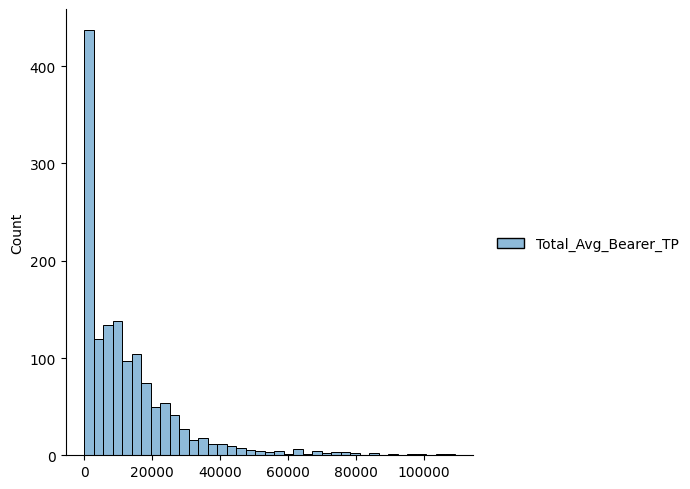

In [14]:
# Distribution of the average throughput per handset type
sorted_by_tp = handset_type_agg.groupby('Handset Type').agg(
     {'Total_Avg_Bearer_TP': 'mean'})

sns.displot(sorted_by_tp)


findings

Majority of the handset types seem to have low data throughput, suggesting that most devices may not be utilizing high-speed data connections or are operating under less favorable network conditions.


The long tail indicates that there are a few handset types achieving significantly higher throughput, but these are quite rare in comparison to the overall dataset.

Task 3.4

perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [15]:
metrics = telecom_df[[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP"]].copy()
metrics.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,47.000000,67.0,2.156957e+07
1,70.000000,42.0,2.156957e+07
2,127.458589,15.0,2.156957e+07
3,127.458589,88.0,2.156957e+07
4,127.458589,15.0,2.156957e+07


In [16]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(metrics)
pd.DataFrame(scaled_array).head()

,0,1,2
0,-0.142369,-0.559296,3.145329e-17
1,-0.101671,-0.560227,3.145329e-17
2,0.000000,-0.561234,3.145329e-17
3,0.000000,-0.558513,3.145329e-17
4,0.000000,-0.561234,3.145329e-17


In [17]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.246683,-0.969096,5.449939e-17
1,-0.178565,-0.983928,5.524145e-17
2,0.000000,-1.000000,5.604310e-17
3,0.000000,-1.000000,5.631616e-17
4,0.000000,-1.000000,5.604310e-17


In [18]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)